<a href="https://colab.research.google.com/github/M4rck0/Aprendizaje_Automatico/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Librerías
import pandas as pd
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [6]:
df = pd.read_csv("/content/bd_boston.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [43]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
x = df.drop(columns=["medv"])
y = df["medv"]

In [9]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [10]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [12]:
valor_f = f_regression(x, y)
valor_f

(array([ 89.48611476,  75.2576423 , 153.95488314,  15.97151242,
        112.59148028, 471.84673988,  83.47745922,  33.57957033,
         85.91427767, 141.76135658, 175.10554288,  63.05422911,
        601.61787111]),
 array([1.17398708e-19, 5.71358415e-17, 4.90025998e-31, 7.39062317e-05,
        7.06504159e-24, 2.48722887e-74, 1.56998221e-18, 1.20661173e-08,
        5.46593257e-19, 5.63773363e-29, 1.60950948e-34, 1.31811273e-14,
        5.08110339e-88]))

In [13]:
pasan_prueba = []
no_pasan_prueba = []
alpha = 0.05

for i in range(len(valor_f[1])):
    if valor_f[1][i] < alpha:
        pasan_prueba.append(x.columns[i])
    else:
        no_pasan_prueba.append(x.columns[i])

In [14]:
pasan_prueba

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [15]:
no_pasan_prueba

[]

In [16]:
df_resultados = pd.DataFrame(valor_f[0], index = x.columns, columns=['valor_f'])
df_resultados

,valor_f
crim,89.486115
zn,75.257642
indus,153.954883
chas,15.971512
nox,112.591480
rm,471.846740
age,83.477459
dis,33.579570
rad,85.914278
tax,141.761357


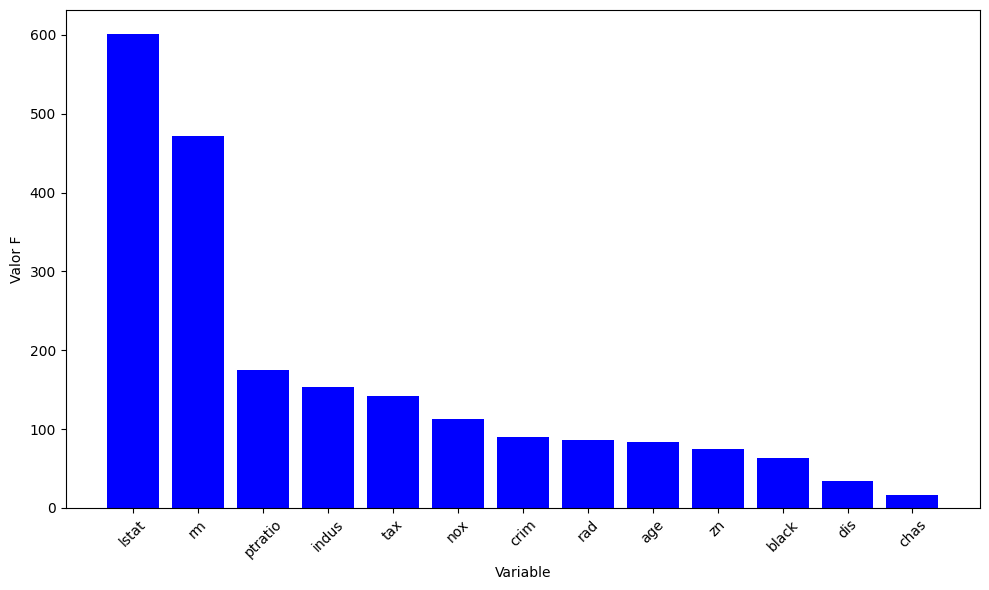

In [44]:
# Ordenar de mayor a menor
df_ordenado = df_resultados.sort_values(by = 'valor_f', ascending = False)

# Gráfica
plt.figure(figsize = (10, 6))
plt.bar(df_ordenado.index, df_ordenado.valor_f, color = 'blue')
plt.xticks(rotation = 45)
plt.ylabel("Valor F")
plt.xlabel("Variable")
plt.tight_layout()
plt.show()

In [22]:
escalador = MinMaxScaler()
escala = escalador.fit_transform(x)
x_escalada = pd.DataFrame(escala, columns=x.columns)
x_escalada

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [24]:
selector = VarianceThreshold()
selector.fit_transform(x_escalada)
selector.variances_

array([0.00932841, 0.05428618, 0.06311681, 0.06438548, 0.0567372 ,
       0.01808855, 0.08387336, 0.03659295, 0.14303692, 0.10324509,
       0.05293941, 0.0528898 , 0.03875164])

In [25]:
df_resultados['varianza'] = selector.variances_
df_resultados

,valor_f,varianza
crim,89.486115,0.009328
zn,75.257642,0.054286
indus,153.954883,0.063117
chas,15.971512,0.064385
nox,112.591480,0.056737
rm,471.846740,0.018089
age,83.477459,0.083873
dis,33.579570,0.036593
rad,85.914278,0.143037
tax,141.761357,0.103245


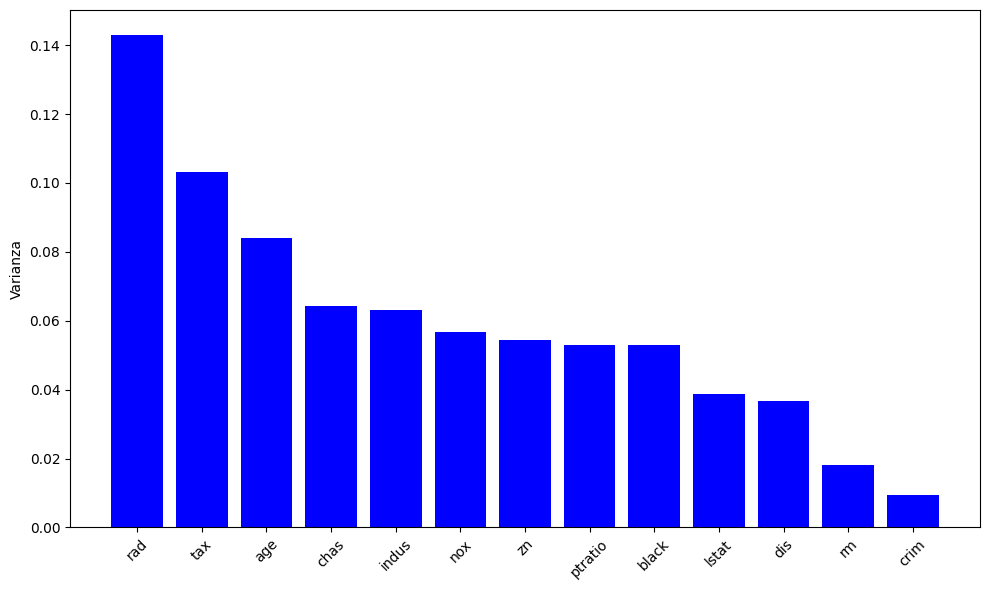

In [46]:
# Ordenar de mayor a menor
df_ordenado = df_resultados.sort_values(by = 'varianza', ascending = False)

# Gráfico
plt.figure(figsize = (10, 6))
plt.bar(df_ordenado.index, df_ordenado.varianza, color = 'blue')
plt.xticks(rotation = 45)
plt.ylabel("Varianza")
plt.tight_layout()
plt.show()

In [29]:
mi = mutual_info_regression(x, y)
mi

array([0.35096458, 0.1734606 , 0.45629766, 0.01375791, 0.46432215,
       0.52983167, 0.3129143 , 0.30121723, 0.20960668, 0.35286812,
       0.43827513, 0.16443132, 0.67002741])

In [30]:
df_resultados['mi'] = mi
df_resultados

,valor_f,varianza,mi
crim,89.486115,0.009328,0.350965
zn,75.257642,0.054286,0.173461
indus,153.954883,0.063117,0.456298
chas,15.971512,0.064385,0.013758
nox,112.591480,0.056737,0.464322
rm,471.846740,0.018089,0.529832
age,83.477459,0.083873,0.312914
dis,33.579570,0.036593,0.301217
rad,85.914278,0.143037,0.209607
tax,141.761357,0.103245,0.352868


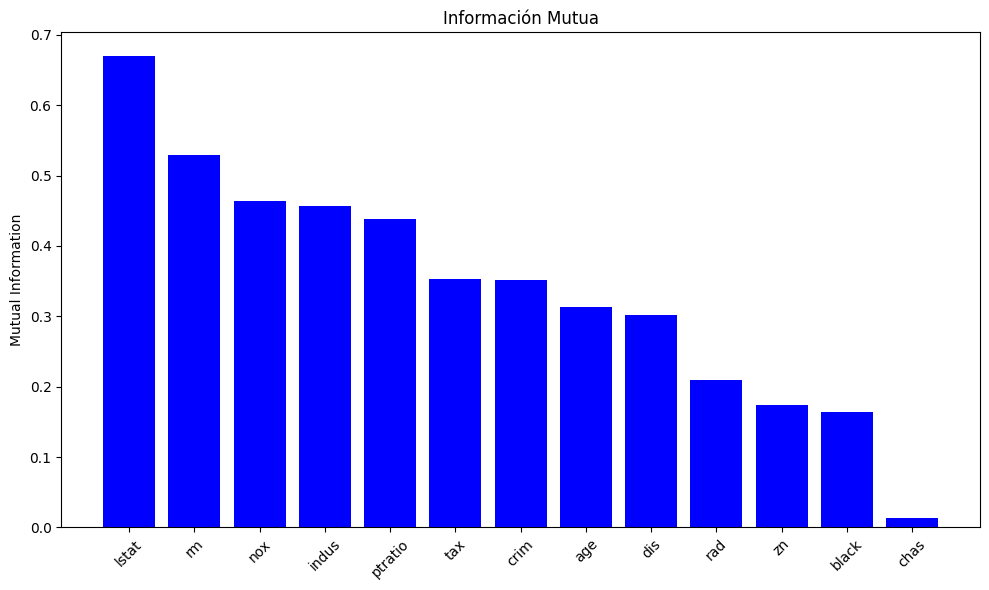

In [49]:
# Ordenar de mayor a menor
df_ordenado = df_resultados.sort_values(by = 'mi', ascending = False)

# Graficar
plt.figure(figsize = (10, 6))
plt.bar(df_ordenado.index, df_ordenado.mi, color = 'blue')
plt.xticks(rotation = 45)
plt.title("Información Mutua")
plt.ylabel("Mutual Information")
plt.tight_layout()
plt.show()

In [34]:
lr = LinearRegression()
lr

LinearRegression()

In [35]:
efs = EFS(estimator = lr,        # Use linear regression as the classifier/estimator
          min_features = 1,      # The minimum number of features to consider is 1
          max_features = 5,      # The maximum number of features to consider is 4
          scoring = 'neg_mean_absolute_error',  # The metric to use to evaluate the classifier is accuracy
          cv = 5) # Validación cruzada

In [36]:
efs = efs.fit(x, y)

Features: 2379/2379

In [37]:
efs.best_score_

np.float64(-3.9346879506618615)

In [38]:
efs.best_feature_names_

('rm', 'dis', 'ptratio', 'black', 'lstat')

In [39]:
df_resultados_efs = pd.DataFrame(efs.get_metric_dict()).T
df_resultados_efs = df_resultados_efs.sort_values('avg_score', ascending = False)
df_resultados_efs

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
2352,"(5, 7, 10, 11, 12)","[-2.3921651906597305, -3.9474325138315534, -3....",-3.934688,"(rm, dis, ptratio, black, lstat)",1.237138,0.962535,0.481268
1424,"(0, 3, 5, 10, 12)","[-2.4546803454651265, -3.906950287260543, -4.3...",-3.956496,"(crim, chas, rm, ptratio, lstat)",1.092337,0.849875,0.424938
2276,"(4, 5, 7, 10, 12)","[-2.825296465190852, -3.6847074108469333, -3.8...",-3.967512,"(nox, rm, dis, ptratio, lstat)",1.075295,0.836616,0.418308
2217,"(3, 5, 10, 11, 12)","[-2.474609399286123, -3.7482676136653033, -4.2...",-3.976346,"(chas, rm, ptratio, black, lstat)",1.238256,0.963405,0.481703
1540,"(0, 5, 7, 10, 12)","[-2.3869023320659495, -4.190499392032104, -4.0...",-3.983023,"(crim, rm, dis, ptratio, lstat)",1.107963,0.862033,0.431016
...,...,...,...,...,...,...,...
1930,"(2, 3, 4, 7, 8)","[-5.634238436863891, -8.755959362325148, -8.60...",-6.722012,"(indus, chas, nox, dis, rad)",2.21693,1.724847,0.862424
2039,"(2, 4, 7, 8, 11)","[-5.967556784285944, -9.291479432669515, -6.96...",-6.755742,"(indus, nox, dis, rad, black)",2.076538,1.615617,0.807809
49,"(3, 7)","[-4.935613047136496, -6.257427703524074, -9.22...",-6.902119,"(chas, dis)",1.800771,1.401061,0.700531
7,"(7,)","[-5.146405615652309, -6.150247695149259, -8.90...",-7.000079,"(dis,)",1.635014,1.272096,0.636048


[]

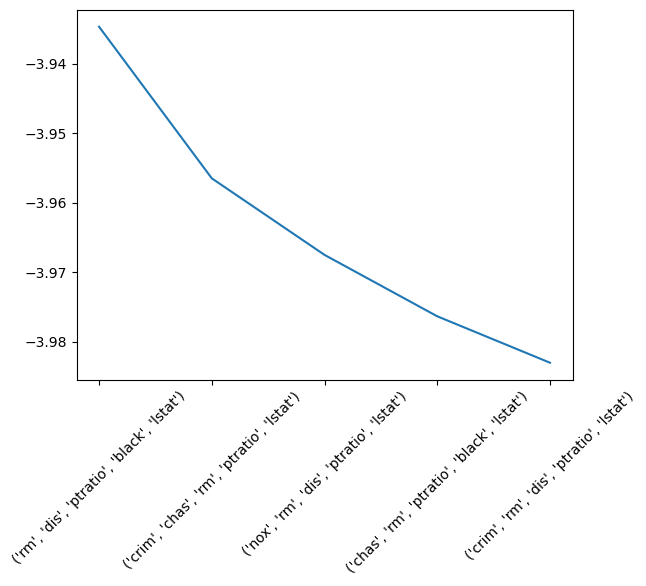

In [40]:
plt.figure()

plt.plot(
    df_resultados_efs.iloc[:5].feature_names.astype(str),
    df_resultados_efs.iloc[:5].avg_score,
)

plt.xticks(rotation = 45)

plt.plot()

De acuerdo con Scikit-learn, se tienen las siguientes características:

*   Regresión-F es una función que realiza pruebas de regresión univariada con el objetivo de probar el efecto de un solo regresor, evaluandolos secuencialmente para los regresores. Dados los resultados, se obtuvo que "lstat" y "rm" (porcentaje de población de bajo estatus socioeconómico y promedio de habitaciones por vivienda, respectivamente) tienen un valor-F alto con respecto a las demás variables (mayor a 450).

*   La información mutua corresponde a una variable continua, en donde el valor resultante es no negativo. Dicha función se basa en métodos no parámetricos. Teniendo esto en cuenta, se descartan las variables "chas" (colinda terreno con un rio) y "rad" (accesibilidad a autopistas) debido a su naturaleza. Obteniendo "tax" y "age" (tasa de impuesto a la propiedad y proporción de casas ocupadas por sus dueños, respectivamente) mayor varianza.

*   Finalmente, VarianceThreshold elimina toda las variables con varianza baja. Dados los resultados, el top 2 corresponden a "lstat" y "rm" similares a las variables analizadas con regresión-F.

Un análisis adicional sugerido es aplicar **PCA** para evaluar cuánto explican las variables seleccionadas por los filtros mencionados.

# **Fuentes**
* scikit-learn. SelectKBest. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.htm
* A. Kraskov, H. Stogbauer and P. Grassberger, “Estimating mutual information”. Phys. Rev. E 69, 2004.
* B. C. Ross “Mutual Information between Discrete and Continuous Data Sets”. PLoS ONE 9(2), 2014.
* L. F. Kozachenko, N. N. Leonenko, “Sample Estimate of the Entropy of a Random Vector”, Probl. Peredachi Inf.